In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import openai
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import re
import data

In [2]:
df = data.get_metadata()

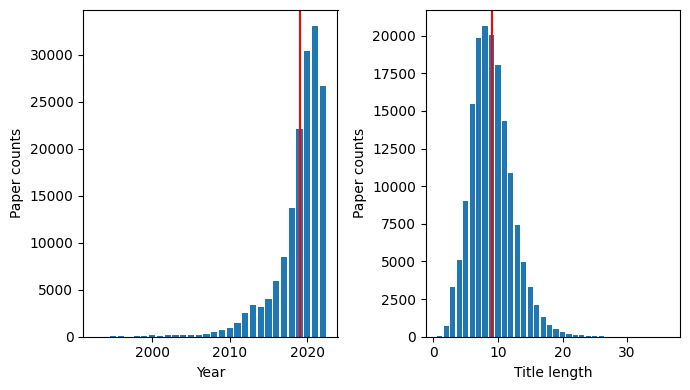

In [4]:
R, C = 1, 2
plt.figure(figsize=(7, 4))
plt.subplot(R, C, 1)
vals = df.year.value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.axvline(np.mean(df.year), color='r')
plt.xlabel('Year')
plt.ylabel('Paper counts')

plt.subplot(R, C, 2)
vals = df['title_len'].value_counts()
plt.bar(x=vals.index, height=vals.values)
plt.axvline(np.mean(df.title.str.split(' ').apply(len)), color='r')
plt.xlabel('Title length')
plt.ylabel('Paper counts')
plt.tight_layout()
plt.savefig('figs/paper_metadata.svg', bbox_inches='tight')
plt.show()

In [4]:
title_length_min = 6
title_length_max = 20
df = df[(df.title_len > title_length_min) & (df.title_len < title_length_max)]

In [5]:
date_cutoff = '2022-04-01'

test_frac = 0.1
df_test_recent = df[df.date > date_cutoff]
df_old = df[df.date <= date_cutoff]
rng = np.random.seed(42)
df_train, df_test_old = train_test_split(df_old, test_size=int(df_old.shape[0] * test_frac), random_state=42)
print('all', df.shape, 'train', df_train.shape, 'test recent', df_test_recent.shape, 'test old', df_test_old.shape)

all (124214, 6) train (98388, 6) test recent (14895, 6) test old (10931, 6)


In [6]:
df_train.to_pickle('../data/df_train.pkl')
df_test_old.to_pickle('../data/df_test_old.pkl')
df_test_recent.to_pickle('../data/df_test_recent.pkl')

Bad pipe message: %s [b'\x03\xfe\x8e\xda\x81-E\x8c\x14\xcd\n\xb6\xd0Y\xe0\x111q \x15\\\x14\xe9&\xdd7AcFO&=WO\xcb8\xf4\t\xda\x84\xa8\x03\xb5\xd0\x8d\x05i\x97\xad|\xbd\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.', b'\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\xe4\xa25~\xc3n\xe1\xbf\xa2\xd4\xa9h\xaf\xce\x14\xe5\x0c\xc6 \xc0o\x90}\x95\xc3\x08\xfb\xdeS\xe5\xe6\x9a\xf1\xc5\xc0']
Bad pipe message: %s [b"V\xc9\x08Sx\xdd\x9f\xed\xfa\xd4\x83\x9c\xaa\x85\xc5\xdf\xcb\xef\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0", b'\x14\x009\x008\xc0\t\xc0\x13']